# Accessing the Trigger

In ATLAS all access to trigger data is via the Trigger Decision Tool (TDT). There is quite a bit of information attached to the trigger, and its layout is quite complex - for that reason one should use the TDT to access the data.

In [1]:
import matplotlib.pyplot as plt
from config import ds_zee as ds
from func_adl_servicex_xaodr21 import tdt_chain_fired
from triggers import tmt_match_object

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


## Looking for events that fired a chain

Lets look at $Z \rightarrow ee$ Monte Carlo for a single electron trigger in the event.

In [2]:
n_electrons = (ds.Select(lambda e:
                            {
                                "n_ele": e.Electrons("Electrons").Where(lambda e: abs(e.eta()) < 2.5).Count(),
                                "fired": tdt_chain_fired("HLT_e60_lhmedium_nod0"),
                            })
                .AsAwkwardArray()
                .value()
               )

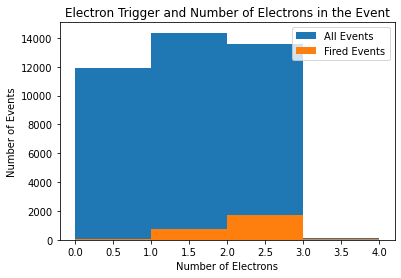

In [3]:
plt.hist(n_electrons.n_ele, bins=4, range=(0, 4), label='All Events')
plt.hist(n_electrons.n_ele[n_electrons.fired], bins=4, range=(0, 4), label='Fired Events')
plt.xlabel('Number of Electrons')
plt.ylabel('Number of Events')
plt.title('Electron Trigger and Number of Electrons in the Event')
_ = plt.legend()

## Trigger Matching

Next, let's find the electrons that matched that trigger that fired above. We'll do this by looking only at events where the trigger has fired, and then asking each electron if it matches withing a $\Delta R$.

In [4]:
matched_electrons = (
    ds.Where(lambda e: tdt_chain_fired("HLT_e60_lhmedium_nod0"))
    .SelectMany(lambda e: e.Electrons("Electrons"))
    .Select(
        lambda e: {
            "pt": e.pt() / 1000.0,
            "eta": e.eta(),
            "is_trig": tmt_match_object("HLT_e60_lhmedium_nod0", e, 0.7),
        }
    )
    .AsAwkwardArray()
    .value()
)

Docker image and tag: atlas/analysisbase:21.2.197
Docker Output: 
  Configured GCC from: /opt/lcg/gcc/8.3.0-cebb0/x86_64-centos7/bin/gcc
  Configured AnalysisBase from: /usr/AnalysisBase/21.2.197/InstallArea/x86_64-centos7-gcc8-opt
  -- The C compiler identification is GNU 8.3.0
  -- The CXX compiler identification is GNU 8.3.0
  -- Detecting C compiler ABI info
  -- Detecting C compiler ABI info - done
  -- Check for working C compiler: /opt/lcg/gcc/8.3.0-cebb0/x86_64-centos7/bin/gcc - skipped
  -- Detecting C compile features
  -- Detecting C compile features - done
  -- Detecting CXX compiler ABI info
  -- Detecting CXX compiler ABI info - done
  -- Check for working CXX compiler: /opt/lcg/gcc/8.3.0-cebb0/x86_64-centos7/bin/g++ - skipped
  -- Detecting CXX compile features
  -- Detecting CXX compile features - done
  -- Found AnalysisBase: /usr/AnalysisBase/21.2.197/InstallArea/x86_64-centos7-gcc8-opt (version: 21.2.197)
  -- Found AnalysisBaseExternals: /usr/AnalysisBaseExternals/2

DockerException: The docker command executed was `C:\Program Files\Docker\Docker\resources\bin\docker.EXE container run --rm --volume C:\Users\gordo\AppData\Local\Temp\tmplmap_fz7:/scripts:ro --volume C:\Users\gordo\AppData\Local\Temp\tmplmap_fz7:/results: --volume C:\Users\gordo\Code\atlas\data\R21\DAOD_PHYS\361106:/data/:ro atlas/analysisbase:21.2.197 /scripts/runner.sh`.
It returned with code 1
The content of stdout can be found above the stacktrace (it wasn't captured).
The content of stderr is '[TFile::Cp] Total 4.45 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 4.45 MB	|====>...............| 21.43 % [0.9 MB/s][TFile::Cp] Total 4.45 MB	|========>...........| 42.86 % [0.6 MB/s][TFile::Cp] Total 4.45 MB	|============>.......| 64.28 % [0.7 MB/s][TFile::Cp] Total 4.45 MB	|=================>..| 85.71 % [0.9 MB/s][TFile::Cp] Total 4.45 MB	|====================| 100.00 % [0.9 MB/s]
[TFile::Cp] Total 17.57 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 17.57 MB	|=>..................| 5.43 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|==>.................| 10.86 % [2.0 MB/s][TFile::Cp] Total 17.57 MB	|===>................| 16.28 % [2.0 MB/s][TFile::Cp] Total 17.57 MB	|====>...............| 21.71 % [2.0 MB/s][TFile::Cp] Total 17.57 MB	|=====>..............| 27.14 % [2.0 MB/s][TFile::Cp] Total 17.57 MB	|======>.............| 32.57 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|=======>............| 37.99 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|========>...........| 43.42 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|=========>..........| 48.85 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|==========>.........| 54.28 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|===========>........| 59.71 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|=============>......| 65.13 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|==============>.....| 70.56 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|===============>....| 75.99 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|================>...| 81.42 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|=================>..| 86.85 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|==================>.| 92.27 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|===================>| 97.70 % [1.9 MB/s][TFile::Cp] Total 17.57 MB	|====================| 100.00 % [1.9 MB/s]
[TFile::Cp] Total 16.57 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 16.57 MB	|=>..................| 5.76 % [1.8 MB/s][TFile::Cp] Total 16.57 MB	|==>.................| 11.51 % [1.8 MB/s][TFile::Cp] Total 16.57 MB	|===>................| 17.27 % [1.8 MB/s][TFile::Cp] Total 16.57 MB	|====>...............| 23.03 % [1.7 MB/s][TFile::Cp] Total 16.57 MB	|=====>..............| 28.78 % [1.7 MB/s][TFile::Cp] Total 16.57 MB	|======>.............| 34.54 % [1.7 MB/s][TFile::Cp] Total 16.57 MB	|========>...........| 40.29 % [1.8 MB/s][TFile::Cp] Total 16.57 MB	|=========>..........| 46.05 % [1.8 MB/s][TFile::Cp] Total 16.57 MB	|==========>.........| 51.81 % [1.8 MB/s][TFile::Cp] Total 16.57 MB	|===========>........| 57.56 % [1.7 MB/s][TFile::Cp] Total 16.57 MB	|============>.......| 63.32 % [1.8 MB/s][TFile::Cp] Total 16.57 MB	|=============>......| 69.08 % [1.8 MB/s][TFile::Cp] Total 16.57 MB	|==============>.....| 74.83 % [1.8 MB/s][TFile::Cp] Total 16.57 MB	|================>...| 80.59 % [1.8 MB/s][TFile::Cp] Total 16.57 MB	|=================>..| 86.35 % [1.8 MB/s][TFile::Cp] Total 16.57 MB	|==================>.| 92.10 % [1.8 MB/s][TFile::Cp] Total 16.57 MB	|===================>| 97.86 % [1.8 MB/s][TFile::Cp] Total 16.57 MB	|====================| 100.00 % [1.8 MB/s]
[TFile::Cp] Total 17.49 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 17.49 MB	|=>..................| 5.45 % [1.7 MB/s][TFile::Cp] Total 17.49 MB	|==>.................| 10.90 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|===>................| 16.35 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|====>...............| 21.81 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|=====>..............| 27.26 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|======>.............| 32.71 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|=======>............| 38.16 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|========>...........| 43.61 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|=========>..........| 49.06 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|==========>.........| 54.51 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|===========>........| 59.97 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|=============>......| 65.42 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|==============>.....| 70.87 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|===============>....| 76.32 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|================>...| 81.77 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|=================>..| 87.22 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|==================>.| 92.67 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|===================>| 98.13 % [1.8 MB/s][TFile::Cp] Total 17.49 MB	|====================| 100.00 % [1.8 MB/s]
[TFile::Cp] Total 0.59 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.59 MB	|====================| 100.00 % [1.1 MB/s]
[TFile::Cp] Total 0.16 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.16 MB	|====================| 100.00 % [0.9 MB/s]
[TFile::Cp] Total 0.01 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.01 MB	|====================| 100.00 % [0.1 MB/s]
[TFile::Cp] Total 0.01 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.01 MB	|====================| 100.00 % [0.1 MB/s]
[TFile::Cp] Total 0.01 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.01 MB	|====================| 100.00 % [0.1 MB/s]
[TFile::Cp] Total 0.01 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.01 MB	|====================| 100.00 % [0.1 MB/s]
[TFile::Cp] Total 0.01 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.01 MB	|====================| 100.00 % [0.1 MB/s]
[TFile::Cp] Total 0.02 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.02 MB	|====================| 100.00 % [0.0 MB/s]
[TFile::Cp] Total 0.02 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.02 MB	|====================| 100.00 % [0.1 MB/s]
[TFile::Cp] Total 0.05 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.05 MB	|====================| 100.00 % [0.1 MB/s]
[TFile::Cp] Total 0.01 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.01 MB	|====================| 100.00 % [0.1 MB/s]
[TFile::Cp] Total 0.02 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.02 MB	|====================| 100.00 % [0.1 MB/s]
[TFile::Cp] Total 2.27 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 2.27 MB	|========>...........| 42.06 % [0.6 MB/s][TFile::Cp] Total 2.27 MB	|================>...| 84.11 % [0.9 MB/s][TFile::Cp] Total 2.27 MB	|====================| 100.00 % [1.0 MB/s]
[TFile::Cp] Total 2.47 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 2.47 MB	|=======>............| 38.59 % [1.4 MB/s][TFile::Cp] Total 2.47 MB	|===============>....| 77.19 % [1.2 MB/s][TFile::Cp] Total 2.47 MB	|====================| 100.00 % [1.3 MB/s]
[TFile::Cp] Total 2.55 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 2.55 MB	|=======>............| 37.35 % [1.3 MB/s][TFile::Cp] Total 2.55 MB	|==============>.....| 74.69 % [1.5 MB/s][TFile::Cp] Total 2.55 MB	|====================| 100.00 % [1.5 MB/s]
[TFile::Cp] Total 0.02 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.02 MB	|====================| 100.00 % [0.1 MB/s]
[TFile::Cp] Total 0.32 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.32 MB	|====================| 100.00 % [0.4 MB/s]
[TFile::Cp] Total 0.17 MB	|>...................| 0.00 % [0.0 MB/s][TFile::Cp] Total 0.17 MB	|====================| 100.00 % [0.6 MB/s]
Traceback (most recent call last):
  File "../source/analysis/share/ATestRun_eljob.py", line 91, in <module>
    driver.submit(job, options.submission_dir)
Exception: string EL::Driver::submit(const EL::Job& job, const string& location) =>
    failed to submit job (C++ exception of type runtime_error)
'


In [ ]:
matched_electrons

## Further Information

* Tutorial on [trigger for analysis](https://indico.cern.ch/event/860971/contributions/3626403/attachments/1973400/3283452/200122_TriggerTutorial.pdf).
* Trigger Group's [Trigger Analysis Tool](https://twiki.cern.ch/twiki/bin/view/Atlas/TriggerAnalysisTools) twiki page (with a [page devoted to the TDT](https://twiki.cern.ch/twiki/bin/view/Atlas/TrigDecisionTool)).
* [Lowest un-prescaled triggers](https://twiki.cern.ch/twiki/bin/view/Atlas/LowestUnprescaled) per data-taking period twiki.